In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Oseias_1 = "The word of the LORD that came to Hosea, the son of Beeri, in the days of Uzziah, Jotham, Ahaz, and Hezekiah, kings of Judah, and in the days of Jeroboam the son of Joash, king of Israel.The beginning of the word of the LORD by Hosea. And the LORD said to Hosea, Go, take to you a wife of prostitutions and children of prostitutions: for the land has committed great prostitution, departing from the LORD.So he went and took Gomer the daughter of Diblaim; which conceived, and bore him a son.And the LORD said to him, Call his name Jezreel; for yet a little while, and I will avenge the blood of Jezreel on the house of Jehu, and will cause to cease the kingdom of the house of Israel.And it shall come to pass at that day, that I will break the bow of Israel, in the valley of Jezreel.And she conceived again, and bore a daughter. And God said to him, Call her name Loruhamah: for I will no more have mercy on the house of Israel; but I will utterly take them away.But I will have mercy on the house of Judah, and will save them by the LORD their God, and will not save them by bow, nor by sword, nor by battle, by horses, nor by horsemen.Now when she had weaned Loruhamah, she conceived, and bore a son.Then said God, Call his name Loammi: for you are not my people, and I will not be your God.Yet the number of the children of Israel shall be as the sand of the sea, which cannot be measured nor numbered; and it shall come to pass, that in the place where it was said to them, You are not my people, there it shall be said to them, You are the sons of the living God.Then shall the children of Judah and the children of Israel be gathered together, and appoint themselves one head, and they shall come up out of the land: for great shall be the day of Jezreel.".lower()

In [6]:
Oseias_2 = "Say you to your brothers, Ammi; and to your sisters, Ruhamah.Plead with your mother, plead: for she is not my wife, neither am I her husband: let her therefore put away her prostitutions out of her sight, and her adulteries from between her breasts;Lest I strip her naked, and set her as in the day that she was born, and make her as a wilderness, and set her like a dry land, and slay her with thirst.And I will not have mercy on her children; for they be the children of prostitutions.For their mother has played the harlot: she that conceived them has done shamefully: for she said, I will go after my lovers, that give me my bread and my water, my wool and my flax, my oil and my drink.Therefore, behold, I will hedge up your way with thorns, and make a wall, that she shall not find her paths.And she shall follow after her lovers, but she shall not overtake them; and she shall seek them, but shall not find them: then shall she say, I will go and return to my first husband; for then was it better with me than now.For she did not know that I gave her corn, and wine, and oil, and multiplied her silver and gold, which they prepared for Baal.Therefore will I return, and take away my corn in the time thereof, and my wine in the season thereof, and will recover my wool and my flax given to cover her nakedness.And now will I discover her lewdness in the sight of her lovers, and none shall deliver her out of my hand.I will also cause all her mirth to cease, her feast days, her new moons, and her sabbaths, and all her solemn feasts.And I will destroy her vines and her fig trees, whereof she has said, These are my rewards that my lovers have given me: and I will make them a forest, and the beasts of the field shall eat them.And I will visit on her the days of Baalim, wherein she burned incense to them, and she decked herself with her earrings and her jewels, and she went after her lovers, and forgot me, said the LORD.Therefore, behold, I will allure her, and bring her into the wilderness, and speak comfortably to her.And I will give her her vineyards from there, and the valley of Achor for a door of hope: and she shall sing there, as in the days of her youth, and as in the day when she came up out of the land of Egypt.And it shall be at that day, said the LORD, that you shall call me Ishi; and shall call me no more Baali.For I will take away the names of Baalim out of her mouth, and they shall no more be remembered by their name.And in that day will I make a covenant for them with the beasts of the field and with the fowls of heaven, and with the creeping things of the ground: and I will break the bow and the sword and the battle out of the earth, and will make them to lie down safely.And I will betroth you to me for ever; yes, I will betroth you to me in righteousness, and in judgment, and in loving kindness, and in mercies.I will even betroth you to me in faithfulness: and you shall know the LORD.And it shall come to pass in that day, I will hear, said the LORD, I will hear the heavens, and they shall hear the earth;And the earth shall hear the corn, and the wine, and the oil; and they shall hear Jezreel.And I will sow her to me in the earth; and I will have mercy on her that had not obtained mercy; and I will say to them which were not my people, You are my people; and they shall say, You are my God.".lower()

In [7]:
Oseias_3 = "Then said the LORD to me, Go yet, love a woman beloved of her friend, yet an adulteress, according to the love of the LORD toward the children of Israel, who look to other gods, and love flagons of wine.So I bought her to me for fifteen pieces of silver, and for an homer of barley, and an half homer of barley:And I said to her, You shall abide for me many days; you shall not play the harlot, and you shall not be for another man: so will I also be for you.For the children of Israel shall abide many days without a king, and without a prince, and without a sacrifice, and without an image, and without an ephod, and without teraphim:Afterward shall the children of Israel return, and seek the LORD their God, and David their king; and shall fear the LORD and his goodness in the latter days.".lower()

In [8]:
Oseias_4 = "Hear the word of the LORD, you children of Israel: for the LORD has a controversy with the inhabitants of the land, because there is no truth, nor mercy, nor knowledge of God in the land.By swearing, and lying, and killing, and stealing, and committing adultery, they break out, and blood touches blood.Therefore shall the land mourn, and every one that dwells therein shall languish, with the beasts of the field, and with the fowls of heaven; yes, the fishes of the sea also shall be taken away.Yet let no man strive, nor reprove another: for your people are as they that strive with the priest.Therefore shall you fall in the day, and the prophet also shall fall with you in the night, and I will destroy your mother.My people are destroyed for lack of knowledge: because you have rejected knowledge, I will also reject you, that you shall be no priest to me: seeing you have forgotten the law of your God, I will also forget your children.As they were increased, so they sinned against me: therefore will I change their glory into shame.They eat up the sin of my people, and they set their heart on their iniquity.And there shall be, like people, like priest: and I will punish them for their ways, and reward them their doings.For they shall eat, and not have enough: they shall commit prostitution, and shall not increase: because they have left off to take heed to the LORD.Prostitution and wine and new wine take away the heart.My people ask counsel at their stocks, and their staff declares to them: for the spirit of prostitutions has caused them to err, and they have gone a whoring from under their God.They sacrifice on the tops of the mountains, and burn incense on the hills, under oaks and poplars and elms, because the shadow thereof is good: therefore your daughters shall commit prostitution, and your spouses shall commit adultery.I will not punish your daughters when they commit prostitution, nor your spouses when they commit adultery: for themselves are separated with whores, and they sacrifice with harlots: therefore the people that does not understand shall fall.Though you, Israel, play the harlot, yet let not Judah offend; and come not you to Gilgal, neither go you up to Bethaven, nor swear, The LORD lives.For Israel slides back as a backsliding heifer: now the LORD will feed them as a lamb in a large place.Ephraim is joined to idols: let him alone.Their drink is sour: they have committed prostitution continually: her rulers with shame do love, Give you.The wind has bound her up in her wings, and they shall be ashamed because of their sacrifices.".lower()

In [9]:
Oseias_5 = "Hear you this, O priests; and listen, you house of Israel; and give you ear, O house of the king; for judgment is toward you, because you have been a snare on Mizpah, and a net spread on Tabor.And the rebels are profound to make slaughter, though I have been a rebuker of them all.I know Ephraim, and Israel is not hid from me: for now, O Ephraim, you commit prostitution, and Israel is defiled.They will not frame their doings to turn to their God: for the spirit of prostitutions is in the middle of them, and they have not known the LORD.And the pride of Israel does testify to his face: therefore shall Israel and Ephraim fall in their iniquity: Judah also shall fall with them.They shall go with their flocks and with their herds to seek the LORD; but they shall not find him; he has withdrawn himself from them.They have dealt treacherously against the LORD: for they have begotten strange children: now shall a month devour them with their portions.Blow you the cornet in Gibeah, and the trumpet in Ramah: cry aloud at Bethaven, after you, O Benjamin.Ephraim shall be desolate in the day of rebuke: among the tribes of Israel have I made known that which shall surely be.The princes of Judah were like them that remove the bound: therefore I will pour out my wrath on them like water.Ephraim is oppressed and broken in judgment, because he willingly walked after the commandment.Therefore will I be to Ephraim as a moth, and to the house of Judah as rottenness.When Ephraim saw his sickness, and Judah saw his wound, then went Ephraim to the Assyrian, and sent to king Jareb: yet could he not heal you, nor cure you of your wound.For I will be to Ephraim as a lion, and as a young lion to the house of Judah: I, even I, will tear and go away; I will take away, and none shall rescue him.I will go and return to my place, till they acknowledge their offense, and seek my face: in their affliction they will seek me early.".lower()

In [10]:
Oseias_6 = "Come, and let us return to the LORD: for he has torn, and he will heal us; he has smitten, and he will bind us up.After two days will he revive us: in the third day he will raise us up, and we shall live in his sight.Then shall we know, if we follow on to know the LORD: his going forth is prepared as the morning; and he shall come to us as the rain, as the latter and former rain to the earthO Ephraim, what shall I do to you? O Judah, what shall I do to you? for your goodness is as a morning cloud, and as the early dew it goes away.Therefore have I hewed them by the prophets; I have slain them by the words of my mouth: and your judgments are as the light that goes forth.For I desired mercy, and not sacrifice; and the knowledge of God more than burnt offerings.But they like men have transgressed the covenant: there have they dealt treacherously against me.Gilead is a city of them that work iniquity, and is polluted with blood.And as troops of robbers wait for a man, so the company of priests murder in the way by consent: for they commit lewdness.I have seen an horrible thing in the house of Israel: there is the prostitution of Ephraim, Israel is defiled.Also, O Judah, he has set an harvest for you, when I returned the captivity of my people.".lower()

In [11]:
Oseias_7 = "When I would have healed Israel, then the iniquity of Ephraim was discovered, and the wickedness of Samaria: for they commit falsehood; and the thief comes in, and the troop of robbers spoils without.And they consider not in their hearts that I remember all their wickedness: now their own doings have beset them about; they are before my face.They make the king glad with their wickedness, and the princes with their lies.They are all adulterers, as an oven heated by the baker, who ceases from raising after he has kneaded the dough, until it be leavened.In the day of our king the princes have made him sick with bottles of wine; he stretched out his hand with scorners.For they have made ready their heart like an oven, whiles they lie in wait: their baker sleeps all the night; in the morning it burns as a flaming fire.They are all hot as an oven, and have devoured their judges; all their kings are fallen: there is none among them that calls to me.Ephraim, he has mixed himself among the people; Ephraim is a cake not turned.Strangers have devoured his strength, and he knows it not: yes, gray hairs are here and there on him, yet he knows not.And the pride of Israel testifies to his face: and they do not return to the LORD their God, nor seek him for all this.Ephraim also is like a silly dove without heart: they call to Egypt, they go to Assyria.When they shall go, I will spread my net on them; I will bring them down as the fowls of the heaven; I will chastise them, as their congregation has heard.Woe to them! for they have fled from me: destruction to them! because they have transgressed against me: though I have redeemed them, yet they have spoken lies against me.And they have not cried to me with their heart, when they howled on their beds: they assemble themselves for corn and wine, and they rebel against me.Though I have bound and strengthened their arms, yet do they imagine mischief against me.They return, but not to the most High: they are like a deceitful bow: their princes shall fall by the sword for the rage of their tongue: this shall be their derision in the land of Egypt.".lower()

In [12]:
Oseias_8 = "Set the trumpet to your mouth. He shall come as an eagle against the house of the LORD, because they have transgressed my covenant, and trespassed against my law.Israel shall cry to me, My God, we know you.Israel has cast off the thing that is good: the enemy shall pursue him.They have set up kings, but not by me: they have made princes, and I knew it not: of their silver and their gold have they made them idols, that they may be cut off.Your calf, O Samaria, has cast you off; my anger is kindled against them: how long will it be ere they attain to innocence?For from Israel was it also: the workman made it; therefore it is not God: but the calf of Samaria shall be broken in pieces.For they have sown the wind, and they shall reap the whirlwind: it has no stalk; the bud shall yield no meal: if so be it yield, the strangers shall swallow it up.Israel is swallowed up: now shall they be among the Gentiles as a vessel wherein is no pleasure.For they are gone up to Assyria, a wild ass alone by himself: Ephraim has hired lovers.Yes, though they have hired among the nations, now will I gather them, and they shall sorrow a little for the burden of the king of princes.Because Ephraim has made many altars to sin, altars shall be to him to sin.I have written to him the great things of my law, but they were counted as a strange thing.They sacrifice flesh for the sacrifices of my offerings, and eat it; but the LORD accepts them not; now will he remember their iniquity, and visit their sins: they shall return to Egypt.For Israel has forgotten his Maker, and builds temples; and Judah has multiplied fenced cities: but I will send a fire on his cities, and it shall devour the palaces thereof.".lower()

In [13]:
Oseias_9 = "Rejoice not, O Israel, for joy, as other people: for you have gone a whoring from your God, you have loved a reward on every corn floor.The floor and the wine press shall not feed them, and the new wine shall fail in her.They shall not dwell in the LORD' land; but Ephraim shall return to Egypt, and they shall eat unclean things in Assyria.They shall not offer wine offerings to the LORD, neither shall they be pleasing to him: their sacrifices shall be to them as the bread of mourners; all that eat thereof shall be polluted: for their bread for their soul shall not come into the house of the LORD.What will you do in the solemn day, and in the day of the feast of the LORD?For, see, they are gone because of destruction: Egypt shall gather them up, Memphis shall bury them: the pleasant places for their silver, nettles shall possess them: thorns shall be in their tabernacles.The days of visitation are come, the days of recompense are come; Israel shall know it: the prophet is a fool, the spiritual man is mad, for the multitude of your iniquity, and the great hatred.The watchman of Ephraim was with my God: but the prophet is a snare of a fowler in all his ways, and hatred in the house of his God.They have deeply corrupted themselves, as in the days of Gibeah: therefore he will remember their iniquity, he will visit their sins.I found Israel like grapes in the wilderness; I saw your fathers as the first ripe in the fig tree at her first time: but they went to Baalpeor, and separated themselves to that shame; and their abominations were according as they loved.As for Ephraim, their glory shall fly away like a bird, from the birth, and from the womb, and from the conception.Though they bring up their children, yet will I bereave them, that there shall not be a man left: yes, woe also to them when I depart from them!Ephraim, as I saw Tyrus, is planted in a pleasant place: but Ephraim shall bring forth his children to the murderer.Give them, O LORD: what will you give? give them a miscarrying womb and dry breasts.All their wickedness is in Gilgal: for there I hated them: for the wickedness of their doings I will drive them out of my house, I will love them no more: all their princes are rebels.Ephraim is smitten, their root is dried up, they shall bear no fruit: yes, though they bring forth, yet will I slay even the beloved fruit of their womb.My God will cast them away, because they did not listen to him: and they shall be wanderers among the nations.".lower()

In [14]:
Oseias_10 = "Israel is an empty vine, he brings forth fruit to himself: according to the multitude of his fruit he has increased the altars; according to the goodness of his land they have made goodly images.Their heart is divided; now shall they be found faulty: he shall break down their altars, he shall spoil their images.For now they shall say, We have no king, because we feared not the LORD; what then should a king do to us?They have spoken words, swearing falsely in making a covenant: thus judgment springs up as hemlock in the furrows of the field.The inhabitants of Samaria shall fear because of the calves of Bethaven: for the people thereof shall mourn over it, and the priests thereof that rejoiced on it, for the glory thereof, because it is departed from it.It shall be also carried to Assyria for a present to king Jareb: Ephraim shall receive shame, and Israel shall be ashamed of his own counsel.As for Samaria, her king is cut off as the foam on the water.The high places also of Aven, the sin of Israel, shall be destroyed: the thorn and the thistle shall come up on their altars; and they shall say to the mountains, Cover us; and to the hills, Fall on us.O Israel, you have sinned from the days of Gibeah: there they stood: the battle in Gibeah against the children of iniquity did not overtake them.It is in my desire that I should chastise them; and the people shall be gathered against them, when they shall bind themselves in their two furrows.And Ephraim is as an heifer that is taught, and loves to tread out the corn; but I passed over on her fair neck: I will make Ephraim to ride; Judah shall plow, and Jacob shall break his clods.Sow to yourselves in righteousness, reap in mercy; break up your fallow ground: for it is time to seek the LORD, till he come and rain righteousness on you.You have plowed wickedness, you have reaped iniquity; you have eaten the fruit of lies: because you did trust in your way, in the multitude of your mighty men.Therefore shall a tumult arise among your people, and all your fortresses shall be spoiled, as Shalman spoiled Betharbel in the day of battle: the mother was dashed in pieces on her children.So shall Bethel do to you because of your great wickedness: in a morning shall the king of Israel utterly be cut off.".lower()

In [15]:
Oseias_11 = "When Israel was a child, then I loved him, and called my son out of Egypt.As they called them, so they went from them: they sacrificed to Baalim, and burned incense to graven images.I taught Ephraim also to go, taking them by their arms; but they knew not that I healed them.I drew them with cords of a man, with bands of love: and I was to them as they that take off the yoke on their jaws, and I laid meat to them.He shall not return into the land of Egypt, and the Assyrian shall be his king, because they refused to return.And the sword shall abide on his cities, and shall consume his branches, and devour them, because of their own counsels.And my people are bent to backsliding from me: though they called them to the most High, none at all would exalt him.How shall I give you up, Ephraim? how shall I deliver you, Israel? how shall I make you as Admah? how shall I set you as Zeboim? my heart is turned within me, my repentings are kindled together.I will not execute the fierceness of my anger, I will not return to destroy Ephraim: for I am God, and not man; the Holy One in the middle of you: and I will not enter into the city.They shall walk after the LORD: he shall roar like a lion: when he shall roar, then the children shall tremble from the west.They shall tremble as a bird out of Egypt, and as a dove out of the land of Assyria: and I will place them in their houses, said the LORD.Ephraim compasses me about with lies, and the house of Israel with deceit: but Judah yet rules with God, and is faithful with the saints.".lower()

In [16]:
Oseias_12 = "Ephraim feeds on wind, and follows after the east wind: he daily increases lies and desolation; and they do make a covenant with the Assyrians, and oil is carried into Egypt.The LORD has also a controversy with Judah, and will punish Jacob according to his ways; according to his doings will he recompense him.He took his brother by the heel in the womb, and by his strength he had power with God:Yes, he had power over the angel, and prevailed: he wept, and made supplication to him: he found him in Bethel, and there he spoke with us;Even the LORD God of hosts; the LORD is his memorial.Therefore turn you to your God: keep mercy and judgment and wait on your God continually.He is a merchant, the balances of deceit are in his hand: he loves to oppress.And Ephraim said, Yet I am become rich, I have found me out substance: in all my labors they shall find none iniquity in me that were sin.And I that am the LORD your God from the land of Egypt will yet make you to dwell in tabernacles, as in the days of the solemn feast.I have also spoken by the prophets, and I have multiplied visions, and used similitudes, by the ministry of the prophets.Is there iniquity in Gilead? surely they are vanity: they sacrifice bullocks in Gilgal; yes, their altars are as heaps in the furrows of the fields.And Jacob fled into the country of Syria, and Israel served for a wife, and for a wife he kept sheep.And by a prophet the LORD brought Israel out of Egypt, and by a prophet was he preserved.Ephraim provoked him to anger most bitterly: therefore shall he leave his blood on him, and his reproach shall his LORD return to him.".lower()

In [17]:
Oseias_13 = "When Ephraim spoke trembling, he exalted himself in Israel; but when he offended in Baal, he died.And now they sin more and more, and have made them molten images of their silver, and idols according to their own understanding, all of it the work of the craftsmen: they say of them, Let the men that sacrifice kiss the calves.Therefore they shall be as the morning cloud and as the early dew that passes away, as the chaff that is driven with the whirlwind out of the floor, and as the smoke out of the chimney.Yet I am the LORD your God from the land of Egypt, and you shall know no god but me: for there is no savior beside me.I did know you in the wilderness, in the land of great drought.According to their pasture, so were they filled; they were filled, and their heart was exalted; therefore have they forgotten me.Therefore I will be to them as a lion: as a leopard by the way will I observe them:I will meet them as a bear that is bereaved of her whelps, and will rend the lobe of their heart, and there will I devour them like a lion: the wild beast shall tear them.O Israel, you have destroyed yourself; but in me is your help.I will be your king: where is any other that may save you in all your cities? and your judges of whom you said, Give me a king and princes?I gave you a king in my anger, and took him away in my wrath.The iniquity of Ephraim is bound up; his sin is hid.The sorrows of a travailing woman shall come on him: he is an unwise son; for he should not stay long in the place of the breaking forth of children.I will ransom them from the power of the grave; I will redeem them from death: O death, I will be your plagues; O grave, I will be your destruction: repentance shall be hid from my eyes.Though he be fruitful among his brothers, an east wind shall come, the wind of the LORD shall come up from the wilderness, and his spring shall become dry, and his fountain shall be dried up: he shall spoil the treasure of all pleasant vessels.Samaria shall become desolate; for she has rebelled against her God: they shall fall by the sword: their infants shall be dashed in pieces, and their women with child shall be ripped up.".lower()

In [18]:
Oseias_14 = "O Israel, return to the LORD your God; for you have fallen by your iniquity.Take with you words, and turn to the LORD: say to him, Take away all iniquity, and receive us graciously: so will we render the calves of our lips.Asshur shall not save us; we will not ride on horses: neither will we say any more to the work of our hands, You are our gods: for in you the fatherless finds mercy.I will heal their backsliding, I will love them freely: for my anger is turned away from him.I will be as the dew to Israel: he shall grow as the lily, and cast forth his roots as Lebanon.His branches shall spread, and his beauty shall be as the olive tree, and his smell as Lebanon.They that dwell under his shadow shall return; they shall revive as the corn, and grow as the vine: the scent thereof shall be as the wine of Lebanon.Ephraim shall say, What have I to do any more with idols? I have heard him, and observed him: I am like a green fir tree. From me is your fruit found.Who is wise, and he shall understand these things? prudent, and he shall know them? for the ways of the LORD are right, and the just shall walk in them: but the transgressors shall fall therein.".lower()

In [85]:
tokens = nltk.word_tokenize(Oseias_14)

In [86]:
stop_words = set(stopwords.words('english'))

In [87]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [88]:
print(filtered_sentence1)

['israel', ',', 'return', 'lord', 'god', ';', 'fallen', 'iniquity.take', 'words', ',', 'turn', 'lord', ':', 'say', ',', 'take', 'away', 'iniquity', ',', 'receive', 'us', 'graciously', ':', 'render', 'calves', 'lips.asshur', 'shall', 'save', 'us', ';', 'ride', 'horses', ':', 'neither', 'say', 'work', 'hands', ',', 'gods', ':', 'fatherless', 'finds', 'mercy.i', 'heal', 'backsliding', ',', 'love', 'freely', ':', 'anger', 'turned', 'away', 'him.i', 'dew', 'israel', ':', 'shall', 'grow', 'lily', ',', 'cast', 'forth', 'roots', 'lebanon.his', 'branches', 'shall', 'spread', ',', 'beauty', 'shall', 'olive', 'tree', ',', 'smell', 'lebanon.they', 'dwell', 'shadow', 'shall', 'return', ';', 'shall', 'revive', 'corn', ',', 'grow', 'vine', ':', 'scent', 'thereof', 'shall', 'wine', 'lebanon.ephraim', 'shall', 'say', ',', 'idols', '?', 'heard', ',', 'observed', ':', 'like', 'green', 'fir', 'tree', '.', 'fruit', 'found.who', 'wise', ',', 'shall', 'understand', 'things', '?', 'prudent', ',', 'shall', 'kn

In [5]:
data =np.array([["Oseias_1", "'word', 'lord', 'came', 'hosea', ',', 'son', 'beeri', ',', 'days', 'uzziah', ',', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', ',', 'king', 'israel.the', 'beginning', 'word', 'lord', 'hosea', '.', 'lord', 'said', 'hosea', ',', 'go', ',', 'take', 'wife', 'prostitutions', 'children', 'prostitutions', ':', 'land', 'committed', 'great', 'prostitution', ',', 'departing', 'lord.so', 'went', 'took', 'gomer', 'daughter', 'diblaim', ';', 'conceived', ',', 'bore', 'son.and', 'lord', 'said', ',', 'call', 'name', 'jezreel', ';', 'yet', 'little', ',', 'avenge', 'blood', 'jezreel', 'house', 'jehu', ',', 'cause', 'cease', 'kingdom', 'house', 'israel.and', 'shall', 'come', 'pass', 'day', ',', 'break', 'bow', 'israel', ',', 'valley', 'jezreel.and', 'conceived', ',', 'bore', 'daughter', '.', 'god', 'said', ',', 'call', 'name', 'loruhamah', ':', 'mercy', 'house', 'israel', ';', 'utterly', 'take', 'away.but', 'mercy', 'house', 'judah', ',', 'save', 'lord', 'god', ',', 'save', 'bow', ',', 'sword', ',', 'battle', ',', 'horses', ',', 'horsemen.now', 'weaned', 'loruhamah', ',', 'conceived', ',', 'bore', 'son.then', 'said', 'god', ',', 'call', 'name', 'loammi', ':', 'people', ',', 'god.yet', 'number', 'children', 'israel', 'shall', 'sand', 'sea', ',', 'measured', 'numbered', ';', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ',', 'shall', 'said', ',', 'sons', 'living', 'god.then', 'shall', 'children', 'judah', 'children', 'israel', 'gathered', 'together', ',', 'appoint', 'one', 'head', ',', 'shall', 'come', 'land', ':', 'great', 'shall', 'day', 'jezreel', '.'"], 
               ["Oseias_2", "'say', 'brothers', ',', 'ammi', ';', 'sisters', ',', 'ruhamah.plead', 'mother', ',', 'plead', ':', 'wife', ',', 'neither', 'husband', ':', 'let', 'therefore', 'put', 'away', 'prostitutions', 'sight', ',', 'adulteries', 'breasts', ';', 'lest', 'strip', 'naked', ',', 'set', 'day', 'born', ',', 'make', 'wilderness', ',', 'set', 'like', 'dry', 'land', ',', 'slay', 'thirst.and', 'mercy', 'children', ';', 'children', 'prostitutions.for', 'mother', 'played', 'harlot', ':', 'conceived', 'done', 'shamefully', ':', 'said', ',', 'go', 'lovers', ',', 'give', 'bread', 'water', ',', 'wool', 'flax', ',', 'oil', 'drink.therefore', ',', 'behold', ',', 'hedge', 'way', 'thorns', ',', 'make', 'wall', ',', 'shall', 'find', 'paths.and', 'shall', 'follow', 'lovers', ',', 'shall', 'overtake', ';', 'shall', 'seek', ',', 'shall', 'find', ':', 'shall', 'say', ',', 'go', 'return', 'first', 'husband', ';', 'better', 'now.for', 'know', 'gave', 'corn', ',', 'wine', ',', 'oil', ',', 'multiplied', 'silver', 'gold', ',', 'prepared', 'baal.therefore', 'return', ',', 'take', 'away', 'corn', 'time', 'thereof', ',', 'wine', 'season', 'thereof', ',', 'recover', 'wool', 'flax', 'given', 'cover', 'nakedness.and', 'discover', 'lewdness', 'sight', 'lovers', ',', 'none', 'shall', 'deliver', 'hand.i', 'also', 'cause', 'mirth', 'cease', ',', 'feast', 'days', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemn', 'feasts.and', 'destroy', 'vines', 'fig', 'trees', ',', 'whereof', 'said', ',', 'rewards', 'lovers', 'given', ':', 'make', 'forest', ',', 'beasts', 'field', 'shall', 'eat', 'them.and', 'visit', 'days', 'baalim', ',', 'wherein', 'burned', 'incense', ',', 'decked', 'earrings', 'jewels', ',', 'went', 'lovers', ',', 'forgot', ',', 'said', 'lord.therefore', ',', 'behold', ',', 'allure', ',', 'bring', 'wilderness', ',', 'speak', 'comfortably', 'her.and', 'give', 'vineyards', ',', 'valley', 'achor', 'door', 'hope', ':', 'shall', 'sing', ',', 'days', 'youth', ',', 'day', 'came', 'land', 'egypt.and', 'shall', 'day', ',', 'said', 'lord', ',', 'shall', 'call', 'ishi', ';', 'shall', 'call', 'baali.for', 'take', 'away', 'names', 'baalim', 'mouth', ',', 'shall', 'remembered', 'name.and', 'day', 'make', 'covenant', 'beasts', 'field', 'fowls', 'heaven', ',', 'creeping', 'things', 'ground', ':', 'break', 'bow', 'sword', 'battle', 'earth', ',', 'make', 'lie', 'safely.and', 'betroth', 'ever', ';', 'yes', ',', 'betroth', 'righteousness', ',', 'judgment', ',', 'loving', 'kindness', ',', 'mercies.i', 'even', 'betroth', 'faithfulness', ':', 'shall', 'know', 'lord.and', 'shall', 'come', 'pass', 'day', ',', 'hear', ',', 'said', 'lord', ',', 'hear', 'heavens', ',', 'shall', 'hear', 'earth', ';', 'earth', 'shall', 'hear', 'corn', ',', 'wine', ',', 'oil', ';', 'shall', 'hear', 'jezreel.and', 'sow', 'earth', ';', 'mercy', 'obtained', 'mercy', ';', 'say', 'people', ',', 'people', ';', 'shall', 'say', ',', 'god', '.'"],
               ["Oseias_3", "'said', 'lord', ',', 'go', 'yet', ',', 'love', 'woman', 'beloved', 'friend', ',', 'yet', 'adulteress', ',', 'according', 'love', 'lord', 'toward', 'children', 'israel', ',', 'look', 'gods', ',', 'love', 'flagons', 'wine.so', 'bought', 'fifteen', 'pieces', 'silver', ',', 'homer', 'barley', ',', 'half', 'homer', 'barley', ':', 'said', ',', 'shall', 'abide', 'many', 'days', ';', 'shall', 'play', 'harlot', ',', 'shall', 'another', 'man', ':', 'also', 'you.for', 'children', 'israel', 'shall', 'abide', 'many', 'days', 'without', 'king', ',', 'without', 'prince', ',', 'without', 'sacrifice', ',', 'without', 'image', ',', 'without', 'ephod', ',', 'without', 'teraphim', ':', 'afterward', 'shall', 'children', 'israel', 'return', ',', 'seek', 'lord', 'god', ',', 'david', 'king', ';', 'shall', 'fear', 'lord', 'goodness', 'latter', 'days', '.'"],
               ["Oseias_4", "'hear', 'word', 'lord', ',', 'children', 'israel', ':', 'lord', 'controversy', 'inhabitants', 'land', ',', 'truth', ',', 'mercy', ',', 'knowledge', 'god', 'land.by', 'swearing', ',', 'lying', ',', 'killing', ',', 'stealing', ',', 'committing', 'adultery', ',', 'break', ',', 'blood', 'touches', 'blood.therefore', 'shall', 'land', 'mourn', ',', 'every', 'one', 'dwells', 'therein', 'shall', 'languish', ',', 'beasts', 'field', ',', 'fowls', 'heaven', ';', 'yes', ',', 'fishes', 'sea', 'also', 'shall', 'taken', 'away.yet', 'let', 'man', 'strive', ',', 'reprove', 'another', ':', 'people', 'strive', 'priest.therefore', 'shall', 'fall', 'day', ',', 'prophet', 'also', 'shall', 'fall', 'night', ',', 'destroy', 'mother.my', 'people', 'destroyed', 'lack', 'knowledge', ':', 'rejected', 'knowledge', ',', 'also', 'reject', ',', 'shall', 'priest', ':', 'seeing', 'forgotten', 'law', 'god', ',', 'also', 'forget', 'children.as', 'increased', ',', 'sinned', ':', 'therefore', 'change', 'glory', 'shame.they', 'eat', 'sin', 'people', ',', 'set', 'heart', 'iniquity.and', 'shall', ',', 'like', 'people', ',', 'like', 'priest', ':', 'punish', 'ways', ',', 'reward', 'doings.for', 'shall', 'eat', ',', 'enough', ':', 'shall', 'commit', 'prostitution', ',', 'shall', 'increase', ':', 'left', 'take', 'heed', 'lord.prostitution', 'wine', 'new', 'wine', 'take', 'away', 'heart.my', 'people', 'ask', 'counsel', 'stocks', ',', 'staff', 'declares', ':', 'spirit', 'prostitutions', 'caused', 'err', ',', 'gone', 'whoring', 'god.they', 'sacrifice', 'tops', 'mountains', ',', 'burn', 'incense', 'hills', ',', 'oaks', 'poplars', 'elms', ',', 'shadow', 'thereof', 'good', ':', 'therefore', 'daughters', 'shall', 'commit', 'prostitution', ',', 'spouses', 'shall', 'commit', 'adultery.i', 'punish', 'daughters', 'commit', 'prostitution', ',', 'spouses', 'commit', 'adultery', ':', 'separated', 'whores', ',', 'sacrifice', 'harlots', ':', 'therefore', 'people', 'understand', 'shall', 'fall.though', ',', 'israel', ',', 'play', 'harlot', ',', 'yet', 'let', 'judah', 'offend', ';', 'come', 'gilgal', ',', 'neither', 'go', 'bethaven', ',', 'swear', ',', 'lord', 'lives.for', 'israel', 'slides', 'back', 'backsliding', 'heifer', ':', 'lord', 'feed', 'lamb', 'large', 'place.ephraim', 'joined', 'idols', ':', 'let', 'alone.their', 'drink', 'sour', ':', 'committed', 'prostitution', 'continually', ':', 'rulers', 'shame', 'love', ',', 'give', 'you.the', 'wind', 'bound', 'wings', ',', 'shall', 'ashamed', 'sacrifices', '.'"],
               ["Oseias_5", "'hear', ',', 'priests', ';', 'listen', ',', 'house', 'israel', ';', 'give', 'ear', ',', 'house', 'king', ';', 'judgment', 'toward', ',', 'snare', 'mizpah', ',', 'net', 'spread', 'tabor.and', 'rebels', 'profound', 'make', 'slaughter', ',', 'though', 'rebuker', 'all.i', 'know', 'ephraim', ',', 'israel', 'hid', ':', ',', 'ephraim', ',', 'commit', 'prostitution', ',', 'israel', 'defiled.they', 'frame', 'doings', 'turn', 'god', ':', 'spirit', 'prostitutions', 'middle', ',', 'known', 'lord.and', 'pride', 'israel', 'testify', 'face', ':', 'therefore', 'shall', 'israel', 'ephraim', 'fall', 'iniquity', ':', 'judah', 'also', 'shall', 'fall', 'them.they', 'shall', 'go', 'flocks', 'herds', 'seek', 'lord', ';', 'shall', 'find', ';', 'withdrawn', 'them.they', 'dealt', 'treacherously', 'lord', ':', 'begotten', 'strange', 'children', ':', 'shall', 'month', 'devour', 'portions.blow', 'cornet', 'gibeah', ',', 'trumpet', 'ramah', ':', 'cry', 'aloud', 'bethaven', ',', ',', 'benjamin.ephraim', 'shall', 'desolate', 'day', 'rebuke', ':', 'among', 'tribes', 'israel', 'made', 'known', 'shall', 'surely', 'be.the', 'princes', 'judah', 'like', 'remove', 'bound', ':', 'therefore', 'pour', 'wrath', 'like', 'water.ephraim', 'oppressed', 'broken', 'judgment', ',', 'willingly', 'walked', 'commandment.therefore', 'ephraim', 'moth', ',', 'house', 'judah', 'rottenness.when', 'ephraim', 'saw', 'sickness', ',', 'judah', 'saw', 'wound', ',', 'went', 'ephraim', 'assyrian', ',', 'sent', 'king', 'jareb', ':', 'yet', 'could', 'heal', ',', 'cure', 'wound.for', 'ephraim', 'lion', ',', 'young', 'lion', 'house', 'judah', ':', ',', 'even', ',', 'tear', 'go', 'away', ';', 'take', 'away', ',', 'none', 'shall', 'rescue', 'him.i', 'go', 'return', 'place', ',', 'till', 'acknowledge', 'offense', ',', 'seek', 'face', ':', 'affliction', 'seek', 'early', '.'"],
               ["Oseias_6", "'come', ',', 'let', 'us', 'return', 'lord', ':', 'torn', ',', 'heal', 'us', ';', 'smitten', ',', 'bind', 'us', 'up.after', 'two', 'days', 'revive', 'us', ':', 'third', 'day', 'raise', 'us', ',', 'shall', 'live', 'sight.then', 'shall', 'know', ',', 'follow', 'know', 'lord', ':', 'going', 'forth', 'prepared', 'morning', ';', 'shall', 'come', 'us', 'rain', ',', 'latter', 'former', 'rain', 'eartho', 'ephraim', ',', 'shall', '?', 'judah', ',', 'shall', '?', 'goodness', 'morning', 'cloud', ',', 'early', 'dew', 'goes', 'away.therefore', 'hewed', 'prophets', ';', 'slain', 'words', 'mouth', ':', 'judgments', 'light', 'goes', 'forth.for', 'desired', 'mercy', ',', 'sacrifice', ';', 'knowledge', 'god', 'burnt', 'offerings.but', 'like', 'men', 'transgressed', 'covenant', ':', 'dealt', 'treacherously', 'me.gilead', 'city', 'work', 'iniquity', ',', 'polluted', 'blood.and', 'troops', 'robbers', 'wait', 'man', ',', 'company', 'priests', 'murder', 'way', 'consent', ':', 'commit', 'lewdness.i', 'seen', 'horrible', 'thing', 'house', 'israel', ':', 'prostitution', 'ephraim', ',', 'israel', 'defiled.also', ',', 'judah', ',', 'set', 'harvest', ',', 'returned', 'captivity', 'people', '.'"],
               ["Oseias_7", "'would', 'healed', 'israel', ',', 'iniquity', 'ephraim', 'discovered', ',', 'wickedness', 'samaria', ':', 'commit', 'falsehood', ';', 'thief', 'comes', ',', 'troop', 'robbers', 'spoils', 'without.and', 'consider', 'hearts', 'remember', 'wickedness', ':', 'doings', 'beset', ';', 'face.they', 'make', 'king', 'glad', 'wickedness', ',', 'princes', 'lies.they', 'adulterers', ',', 'oven', 'heated', 'baker', ',', 'ceases', 'raising', 'kneaded', 'dough', ',', 'leavened.in', 'day', 'king', 'princes', 'made', 'sick', 'bottles', 'wine', ';', 'stretched', 'hand', 'scorners.for', 'made', 'ready', 'heart', 'like', 'oven', ',', 'whiles', 'lie', 'wait', ':', 'baker', 'sleeps', 'night', ';', 'morning', 'burns', 'flaming', 'fire.they', 'hot', 'oven', ',', 'devoured', 'judges', ';', 'kings', 'fallen', ':', 'none', 'among', 'calls', 'me.ephraim', ',', 'mixed', 'among', 'people', ';', 'ephraim', 'cake', 'turned.strangers', 'devoured', 'strength', ',', 'knows', ':', 'yes', ',', 'gray', 'hairs', ',', 'yet', 'knows', 'not.and', 'pride', 'israel', 'testifies', 'face', ':', 'return', 'lord', 'god', ',', 'seek', 'this.ephraim', 'also', 'like', 'silly', 'dove', 'without', 'heart', ':', 'call', 'egypt', ',', 'go', 'assyria.when', 'shall', 'go', ',', 'spread', 'net', ';', 'bring', 'fowls', 'heaven', ';', 'chastise', ',', 'congregation', 'heard.woe', '!', 'fled', ':', 'destruction', '!', 'transgressed', ':', 'though', 'redeemed', ',', 'yet', 'spoken', 'lies', 'me.and', 'cried', 'heart', ',', 'howled', 'beds', ':', 'assemble', 'corn', 'wine', ',', 'rebel', 'me.though', 'bound', 'strengthened', 'arms', ',', 'yet', 'imagine', 'mischief', 'me.they', 'return', ',', 'high', ':', 'like', 'deceitful', 'bow', ':', 'princes', 'shall', 'fall', 'sword', 'rage', 'tongue', ':', 'shall', 'derision', 'land', 'egypt', '.'"],
               ["Oseias_8", "'set', 'trumpet', 'mouth', '.', 'shall', 'come', 'eagle', 'house', 'lord', ',', 'transgressed', 'covenant', ',', 'trespassed', 'law.israel', 'shall', 'cry', ',', 'god', ',', 'know', 'you.israel', 'cast', 'thing', 'good', ':', 'enemy', 'shall', 'pursue', 'him.they', 'set', 'kings', ',', ':', 'made', 'princes', ',', 'knew', ':', 'silver', 'gold', 'made', 'idols', ',', 'may', 'cut', 'off.your', 'calf', ',', 'samaria', ',', 'cast', ';', 'anger', 'kindled', ':', 'long', 'ere', 'attain', 'innocence', '?', 'israel', 'also', ':', 'workman', 'made', ';', 'therefore', 'god', ':', 'calf', 'samaria', 'shall', 'broken', 'pieces.for', 'sown', 'wind', ',', 'shall', 'reap', 'whirlwind', ':', 'stalk', ';', 'bud', 'shall', 'yield', 'meal', ':', 'yield', ',', 'strangers', 'shall', 'swallow', 'up.israel', 'swallowed', ':', 'shall', 'among', 'gentiles', 'vessel', 'wherein', 'pleasure.for', 'gone', 'assyria', ',', 'wild', 'ass', 'alone', ':', 'ephraim', 'hired', 'lovers.yes', ',', 'though', 'hired', 'among', 'nations', ',', 'gather', ',', 'shall', 'sorrow', 'little', 'burden', 'king', 'princes.because', 'ephraim', 'made', 'many', 'altars', 'sin', ',', 'altars', 'shall', 'sin.i', 'written', 'great', 'things', 'law', ',', 'counted', 'strange', 'thing.they', 'sacrifice', 'flesh', 'sacrifices', 'offerings', ',', 'eat', ';', 'lord', 'accepts', ';', 'remember', 'iniquity', ',', 'visit', 'sins', ':', 'shall', 'return', 'egypt.for', 'israel', 'forgotten', 'maker', ',', 'builds', 'temples', ';', 'judah', 'multiplied', 'fenced', 'cities', ':', 'send', 'fire', 'cities', ',', 'shall', 'devour', 'palaces', 'thereof', '.'"],
               ["Oseias_9", "'rejoice', ',', 'israel', ',', 'joy', ',', 'people', ':', 'gone', 'whoring', 'god', ',', 'loved', 'reward', 'every', 'corn', 'floor.the', 'floor', 'wine', 'press', 'shall', 'feed', ',', 'new', 'wine', 'shall', 'fail', 'her.they', 'shall', 'dwell', 'lord', ', 'land', ';', 'ephraim', 'shall', 'return', 'egypt', ',', 'shall', 'eat', 'unclean', 'things', 'assyria.they', 'shall', 'offer', 'wine', 'offerings', 'lord', ',', 'neither', 'shall', 'pleasing', ':', 'sacrifices', 'shall', 'bread', 'mourners', ';', 'eat', 'thereof', 'shall', 'polluted', ':', 'bread', 'soul', 'shall', 'come', 'house', 'lord.what', 'solemn', 'day', ',', 'day', 'feast', 'lord', '?', ',', 'see', ',', 'gone', 'destruction', ':', 'egypt', 'shall', 'gather', ',', 'memphis', 'shall', 'bury', ':', 'pleasant', 'places', 'silver', ',', 'nettles', 'shall', 'possess', ':', 'thorns', 'shall', 'tabernacles.the', 'days', 'visitation', 'come', ',', 'days', 'recompense', 'come', ';', 'israel', 'shall', 'know', ':', 'prophet', 'fool', ',', 'spiritual', 'man', 'mad', ',', 'multitude', 'iniquity', ',', 'great', 'hatred.the', 'watchman', 'ephraim', 'god', ':', 'prophet', 'snare', 'fowler', 'ways', ',', 'hatred', 'house', 'god.they', 'deeply', 'corrupted', ',', 'days', 'gibeah', ':', 'therefore', 'remember', 'iniquity', ',', 'visit', 'sins.i', 'found', 'israel', 'like', 'grapes', 'wilderness', ';', 'saw', 'fathers', 'first', 'ripe', 'fig', 'tree', 'first', 'time', ':', 'went', 'baalpeor', ',', 'separated', 'shame', ';', 'abominations', 'according', 'loved.as', 'ephraim', ',', 'glory', 'shall', 'fly', 'away', 'like', 'bird', ',', 'birth', ',', 'womb', ',', 'conception.though', 'bring', 'children', ',', 'yet', 'bereave', ',', 'shall', 'man', 'left', ':', 'yes', ',', 'woe', 'also', 'depart', '!', 'ephraim', ',', 'saw', 'tyrus', ',', 'planted', 'pleasant', 'place', ':', 'ephraim', 'shall', 'bring', 'forth', 'children', 'murderer.give', ',', 'lord', ':', 'give', '?', 'give', 'miscarrying', 'womb', 'dry', 'breasts.all', 'wickedness', 'gilgal', ':', 'hated', ':', 'wickedness', 'doings', 'drive', 'house', ',', 'love', ':', 'princes', 'rebels.ephraim', 'smitten', ',', 'root', 'dried', ',', 'shall', 'bear', 'fruit', ':', 'yes', ',', 'though', 'bring', 'forth', ',', 'yet', 'slay', 'even', 'beloved', 'fruit', 'womb.my', 'god', 'cast', 'away', ',', 'listen', ':', 'shall', 'wanderers', 'among', 'nations', '.'"],
               ["Oseias_10", "'israel', 'empty', 'vine', ',', 'brings', 'forth', 'fruit', ':', 'according', 'multitude', 'fruit', 'increased', 'altars', ';', 'according', 'goodness', 'land', 'made', 'goodly', 'images.their', 'heart', 'divided', ';', 'shall', 'found', 'faulty', ':', 'shall', 'break', 'altars', ',', 'shall', 'spoil', 'images.for', 'shall', 'say', ',', 'king', ',', 'feared', 'lord', ';', 'king', 'us', '?', 'spoken', 'words', ',', 'swearing', 'falsely', 'making', 'covenant', ':', 'thus', 'judgment', 'springs', 'hemlock', 'furrows', 'field.the', 'inhabitants', 'samaria', 'shall', 'fear', 'calves', 'bethaven', ':', 'people', 'thereof', 'shall', 'mourn', ',', 'priests', 'thereof', 'rejoiced', ',', 'glory', 'thereof', ',', 'departed', 'it.it', 'shall', 'also', 'carried', 'assyria', 'present', 'king', 'jareb', ':', 'ephraim', 'shall', 'receive', 'shame', ',', 'israel', 'shall', 'ashamed', 'counsel.as', 'samaria', ',', 'king', 'cut', 'foam', 'water.the', 'high', 'places', 'also', 'aven', ',', 'sin', 'israel', ',', 'shall', 'destroyed', ':', 'thorn', 'thistle', 'shall', 'come', 'altars', ';', 'shall', 'say', 'mountains', ',', 'cover', 'us', ';', 'hills', ',', 'fall', 'us.o', 'israel', ',', 'sinned', 'days', 'gibeah', ':', 'stood', ':', 'battle', 'gibeah', 'children', 'iniquity', 'overtake', 'them.it', 'desire', 'chastise', ';', 'people', 'shall', 'gathered', ',', 'shall', 'bind', 'two', 'furrows.and', 'ephraim', 'heifer', 'taught', ',', 'loves', 'tread', 'corn', ';', 'passed', 'fair', 'neck', ':', 'make', 'ephraim', 'ride', ';', 'judah', 'shall', 'plow', ',', 'jacob', 'shall', 'break', 'clods.sow', 'righteousness', ',', 'reap', 'mercy', ';', 'break', 'fallow', 'ground', ':', 'time', 'seek', 'lord', ',', 'till', 'come', 'rain', 'righteousness', 'you.you', 'plowed', 'wickedness', ',', 'reaped', 'iniquity', ';', 'eaten', 'fruit', 'lies', ':', 'trust', 'way', ',', 'multitude', 'mighty', 'men.therefore', 'shall', 'tumult', 'arise', 'among', 'people', ',', 'fortresses', 'shall', 'spoiled', ',', 'shalman', 'spoiled', 'betharbel', 'day', 'battle', ':', 'mother', 'dashed', 'pieces', 'children.so', 'shall', 'bethel', 'great', 'wickedness', ':', 'morning', 'shall', 'king', 'israel', 'utterly', 'cut', '.'"],
               ["Oseias_11", "'israel', 'child', ',', 'loved', ',', 'called', 'son', 'egypt.as', 'called', ',', 'went', ':', 'sacrificed', 'baalim', ',', 'burned', 'incense', 'graven', 'images.i', 'taught', 'ephraim', 'also', 'go', ',', 'taking', 'arms', ';', 'knew', 'healed', 'them.i', 'drew', 'cords', 'man', ',', 'bands', 'love', ':', 'take', 'yoke', 'jaws', ',', 'laid', 'meat', 'them.he', 'shall', 'return', 'land', 'egypt', ',', 'assyrian', 'shall', 'king', ',', 'refused', 'return.and', 'sword', 'shall', 'abide', 'cities', ',', 'shall', 'consume', 'branches', ',', 'devour', ',', 'counsels.and', 'people', 'bent', 'backsliding', ':', 'though', 'called', 'high', ',', 'none', 'would', 'exalt', 'him.how', 'shall', 'give', ',', 'ephraim', '?', 'shall', 'deliver', ',', 'israel', '?', 'shall', 'make', 'admah', '?', 'shall', 'set', 'zeboim', '?', 'heart', 'turned', 'within', ',', 'repentings', 'kindled', 'together.i', 'execute', 'fierceness', 'anger', ',', 'return', 'destroy', 'ephraim', ':', 'god', ',', 'man', ';', 'holy', 'one', 'middle', ':', 'enter', 'city.they', 'shall', 'walk', 'lord', ':', 'shall', 'roar', 'like', 'lion', ':', 'shall', 'roar', ',', 'children', 'shall', 'tremble', 'west.they', 'shall', 'tremble', 'bird', 'egypt', ',', 'dove', 'land', 'assyria', ':', 'place', 'houses', ',', 'said', 'lord.ephraim', 'compasses', 'lies', ',', 'house', 'israel', 'deceit', ':', 'judah', 'yet', 'rules', 'god', ',', 'faithful', 'saints', '.'"],
               ["Oseias_12", "'ephraim', 'feeds', 'wind', ',', 'follows', 'east', 'wind', ':', 'daily', 'increases', 'lies', 'desolation', ';', 'make', 'covenant', 'assyrians', ',', 'oil', 'carried', 'egypt.the', 'lord', 'also', 'controversy', 'judah', ',', 'punish', 'jacob', 'according', 'ways', ';', 'according', 'doings', 'recompense', 'him.he', 'took', 'brother', 'heel', 'womb', ',', 'strength', 'power', 'god', ':', 'yes', ',', 'power', 'angel', ',', 'prevailed', ':', 'wept', ',', 'made', 'supplication', ':', 'found', 'bethel', ',', 'spoke', 'us', ';', 'even', 'lord', 'god', 'hosts', ';', 'lord', 'memorial.therefore', 'turn', 'god', ':', 'keep', 'mercy', 'judgment', 'wait', 'god', 'continually.he', 'merchant', ',', 'balances', 'deceit', 'hand', ':', 'loves', 'oppress.and', 'ephraim', 'said', ',', 'yet', 'become', 'rich', ',', 'found', 'substance', ':', 'labors', 'shall', 'find', 'none', 'iniquity', 'sin.and', 'lord', 'god', 'land', 'egypt', 'yet', 'make', 'dwell', 'tabernacles', ',', 'days', 'solemn', 'feast.i', 'also', 'spoken', 'prophets', ',', 'multiplied', 'visions', ',', 'used', 'similitudes', ',', 'ministry', 'prophets.is', 'iniquity', 'gilead', '?', 'surely', 'vanity', ':', 'sacrifice', 'bullocks', 'gilgal', ';', 'yes', ',', 'altars', 'heaps', 'furrows', 'fields.and', 'jacob', 'fled', 'country', 'syria', ',', 'israel', 'served', 'wife', ',', 'wife', 'kept', 'sheep.and', 'prophet', 'lord', 'brought', 'israel', 'egypt', ',', 'prophet', 'preserved.ephraim', 'provoked', 'anger', 'bitterly', ':', 'therefore', 'shall', 'leave', 'blood', ',', 'reproach', 'shall', 'lord', 'return', '.'"],
               ["Oseias_13", "'ephraim', 'spoke', 'trembling', ',', 'exalted', 'israel', ';', 'offended', 'baal', ',', 'died.and', 'sin', ',', 'made', 'molten', 'images', 'silver', ',', 'idols', 'according', 'understanding', ',', 'work', 'craftsmen', ':', 'say', ',', 'let', 'men', 'sacrifice', 'kiss', 'calves.therefore', 'shall', 'morning', 'cloud', 'early', 'dew', 'passes', 'away', ',', 'chaff', 'driven', 'whirlwind', 'floor', ',', 'smoke', 'chimney.yet', 'lord', 'god', 'land', 'egypt', ',', 'shall', 'know', 'god', ':', 'savior', 'beside', 'me.i', 'know', 'wilderness', ',', 'land', 'great', 'drought.according', 'pasture', ',', 'filled', ';', 'filled', ',', 'heart', 'exalted', ';', 'therefore', 'forgotten', 'me.therefore', 'lion', ':', 'leopard', 'way', 'observe', ':', 'meet', 'bear', 'bereaved', 'whelps', ',', 'rend', 'lobe', 'heart', ',', 'devour', 'like', 'lion', ':', 'wild', 'beast', 'shall', 'tear', 'them.o', 'israel', ',', 'destroyed', ';', 'help.i', 'king', ':', 'may', 'save', 'cities', '?', 'judges', 'said', ',', 'give', 'king', 'princes', '?', 'gave', 'king', 'anger', ',', 'took', 'away', 'wrath.the', 'iniquity', 'ephraim', 'bound', ';', 'sin', 'hid.the', 'sorrows', 'travailing', 'woman', 'shall', 'come', ':', 'unwise', 'son', ';', 'stay', 'long', 'place', 'breaking', 'forth', 'children.i', 'ransom', 'power', 'grave', ';', 'redeem', 'death', ':', 'death', ',', 'plagues', ';', 'grave', ',', 'destruction', ':', 'repentance', 'shall', 'hid', 'eyes.though', 'fruitful', 'among', 'brothers', ',', 'east', 'wind', 'shall', 'come', ',', 'wind', 'lord', 'shall', 'come', 'wilderness', ',', 'spring', 'shall', 'become', 'dry', ',', 'fountain', 'shall', 'dried', ':', 'shall', 'spoil', 'treasure', 'pleasant', 'vessels.samaria', 'shall', 'become', 'desolate', ';', 'rebelled', 'god', ':', 'shall', 'fall', 'sword', ':', 'infants', 'shall', 'dashed', 'pieces', ',', 'women', 'child', 'shall', 'ripped', '.'"],
               ["Oseias_14", "'israel', ',', 'return', 'lord', 'god', ';', 'fallen', 'iniquity.take', 'words', ',', 'turn', 'lord', ':', 'say', ',', 'take', 'away', 'iniquity', ',', 'receive', 'us', 'graciously', ':', 'render', 'calves', 'lips.asshur', 'shall', 'save', 'us', ';', 'ride', 'horses', ':', 'neither', 'say', 'work', 'hands', ',', 'gods', ':', 'fatherless', 'finds', 'mercy.i', 'heal', 'backsliding', ',', 'love', 'freely', ':', 'anger', 'turned', 'away', 'him.i', 'dew', 'israel', ':', 'shall', 'grow', 'lily', ',', 'cast', 'forth', 'roots', 'lebanon.his', 'branches', 'shall', 'spread', ',', 'beauty', 'shall', 'olive', 'tree', ',', 'smell', 'lebanon.they', 'dwell', 'shadow', 'shall', 'return', ';', 'shall', 'revive', 'corn', ',', 'grow', 'vine', ':', 'scent', 'thereof', 'shall', 'wine', 'lebanon.ephraim', 'shall', 'say', ',', 'idols', '?', 'heard', ',', 'observed', ':', 'like', 'green', 'fir', 'tree', '.', 'fruit', 'found.who', 'wise', ',', 'shall', 'understand', 'things', '?', 'prudent', ',', 'shall', 'know', '?', 'ways', 'lord', 'right', ',', 'shall', 'walk', ':', 'transgressors', 'shall', 'fall', 'therein', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,114),columns=['Autor', 'Livro'])

In [7]:
print(df)

         Autor                                              Livro
100   Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...
101   Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...
102   Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...
103   Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...
104   Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...
105   Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...
106   Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...
107   Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...
108   Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...
109  Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...
110  Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...
111  Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...
112  Oseias_13  'ephraim', 'spoke', 'trembling', ',', 'exalted...
113  Oseias_14  'israel', ',', 'return', 'lord', 'god', ';', '...


In [8]:
corpus = df['Livro'].tolist()

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

14 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ahaz hezekiah kings judah,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and conceived bore daughter,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and lord said call,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
appoint one head shall,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avenge blood jezreel house,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
away but mercy house,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
battle horses horsemen now,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beeri days uzziah jotham,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beginning word lord hosea,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blood jezreel house jehu,0.080978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [22]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [23]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


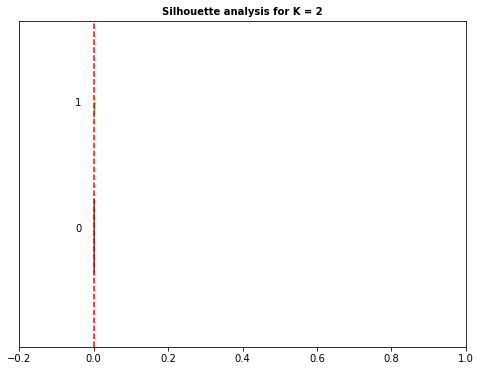

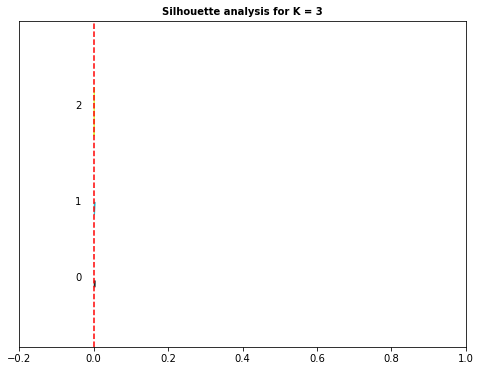

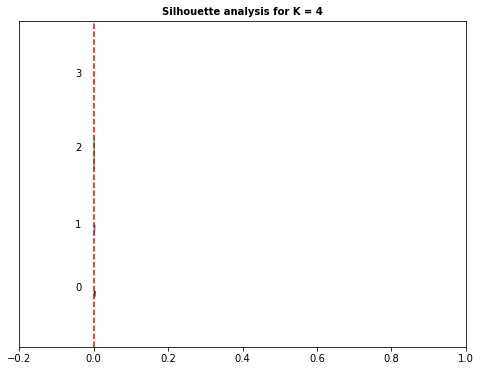

In [24]:
silhouette(kmeans_results, final_df, plot=True)

In [25]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

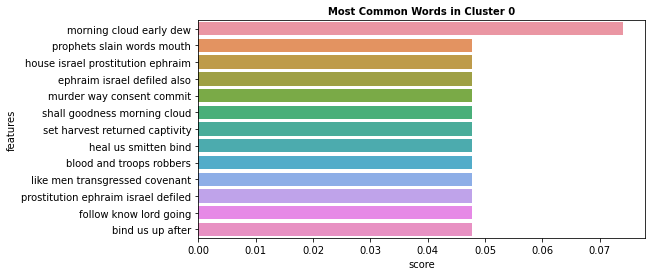

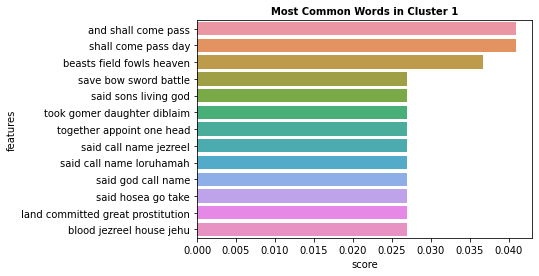

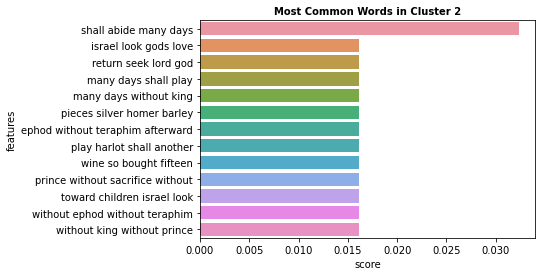

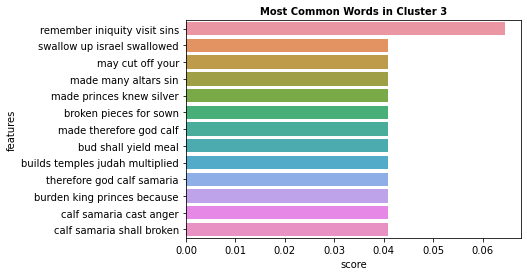

In [26]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [27]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

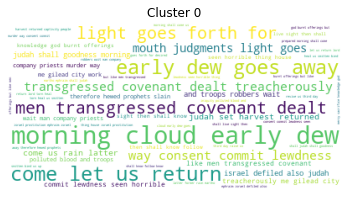

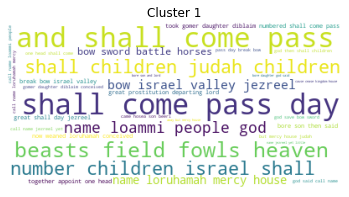

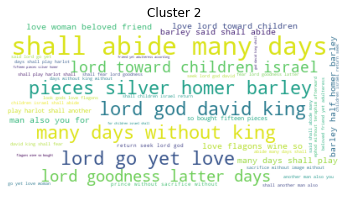

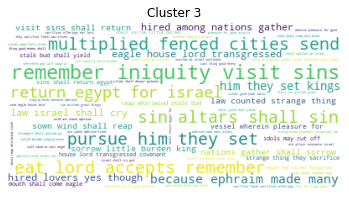

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [29]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Oseias_1,"'word', 'lord', 'came', 'hosea', ',', 'son', '...",1
101,Oseias_2,"'say', 'brothers', ',', 'ammi', ';', 'sisters'...",1
102,Oseias_3,"'said', 'lord', ',', 'go', 'yet', ',', 'love',...",2
103,Oseias_4,"'hear', 'word', 'lord', ',', 'children', 'isra...",1
104,Oseias_5,"'hear', ',', 'priests', ';', 'listen', ',', 'h...",2


In [30]:
print(df)

         Autor                                              Livro  label
100   Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...      1
101   Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...      1
102   Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...      2
103   Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...      1
104   Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...      2
105   Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...      0
106   Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...      2
107   Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...      3
108   Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...      3
109  Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...      2
110  Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...      2
111  Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...      2
112  Oseias_13  'ephraim', 'spoke', 'trembling', ',

# Análise dos resultados

Classe 0 agrupa os capitulos que tratam da exortação de Deus aos principes para o arrependimento e do castigo da nação como um todo.

Classe 1 agrupa os capitulos que tratam do castigo do povo e evidencia sua urgencia.

Classe 2 agrupa os capitulos que tratam casamento simbolico de Oseias.

Classe 3 agrupa os capitulos que tratam dos castigos que virão sobre Israel e possiveis promessas e exortação ao arrependimento.

Classe 0 (Oseias 6, 7, 12, 13)

Classe 1 (Oseias 8, 9)

Classe 2 (Oseias 1, 2)

Classe 3 (Oseias 3, 4, 5, 10, 11, 14)

agrupamento feito com 4 grupos e trigrams 

#######################################################################################################

Classe 0 agrupa os capitulos que tratam da exortação ao arrependimento e anuncio do castigo do povo. 

Classe 1 agrupa os capitulos que tratam do casamento simbolico de Oseias e a ameaça de castigo de Deus. 

Classe 2 agrupa os capitulos que tratam da exortação ao arrependimento e promessas de perdão e as consequencias do pecado. 

Classe 3 agrupa os capitulos que tratam a proximidade do castigo pelos pecados.

Classe 0 (Oseias 6, 13) 

Classe 1 (Oseias 1, 2, 4)

Classe 2 (Oseias 3, 5, 7, 10, 11, 12, 14)

Classe 3 (Oseias 8, 9) 

Agrupamento feito com 4 grupos e quadrigrams. 